In [16]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from robust control import utils

In [27]:
I = np.identity(2)

def GK(s):
    Ggain = np.matrix([[-87.8, 1.4],
                       [-108.2, -1.4]])
    Kgain = np.matrix([[-0.0015, 0],
                       [0, -0.075]])
    return 1/s*Ggain*Kgain


def w_O(s):
    """magnitude multiplicative uncertainty in each input"""
    return (s + 0.2)/(0.5 * s + 1)

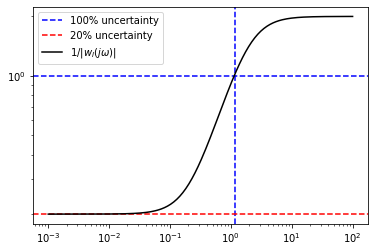

In [28]:
ω = np.logspace(-3, 2, 200)
s = 1j*ω
plt.axhline(1, c='b', ls='--')
plt.axvline(1.15, c='b', ls='--', label='100% uncertainty')
plt.axhline(0.2, c='r', ls='--', label='20% uncertainty')
plt.loglog(ω, np.abs(w_O(s)), 'k',label=r'$1/|w_I(j\omega)|$')
plt.legend()

In [35]:
def T_O(s):
    return GK(s)*(I + GK(s)).I

def M(s):
    return w_O(s)*T_O(s)

#if full block uncertainty:
def maxsigma(G):
    return max(utils.sigmas(G))

#lower bound
def ρ(G): #specrad
    return max(np.abs(np.linalg.eigvals(G)))

def μ_ubound(G):
    """ We use equation 8.87 and minimise directly """
    #improved upper bound
    def scaled_system(d):
        dn = 1  # we set dn = 1 as in note 10 of 8.8.3
        D = np.asmatrix(np.diag([d[0], d[0]]))
        return maxsigma(D*G*D.I)
    r = scipy.optimize.minimize(scaled_system, 1)
    return r['fun']

In [36]:
print('Robust Stability (RS) is attained if μ(T_O(jw)) < 1/|w_O(jw)| for all applicable omega range')

Robust Stability (RS) is attained if μ(T_O(jw)) < 1/|w_O(jw)| for all applicable omega range


In [37]:
ω = np.logspace(-3, 2, 200)
s = 1j*ω

ubound = [μ_ubound(T_O(si)) for si in s]
rhoT = [ρ(T_O(si)) for si in s]
sigmas = [maxsigma(T_O(si)) for si in s]

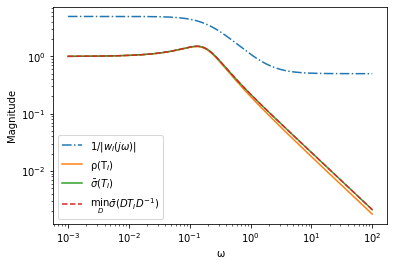

In [49]:
plt.loglog(ω, 1/np.abs(w_I(s)), ls='-.', label=r'$1/|w_I(jω)|$')
plt.loglog(ω, rhoT, label=r'ρ(T$_I$)')
plt.loglog(ω, sigmas, label=r'$\barσ(T_I)$')
plt.loglog(ω, ubound, ls='--', label=r'$\min_{D}\barσ(DT_ID^{-1})$')

plt.legend(loc='best')
plt.xlabel(r'ω')
plt.ylabel('Magnitude')

plt.show()